In [29]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from vae_lib.nn.simple_nn import SimpleNN
import vae_lib.utils.nn_logger as log
import tensorflow as tf
from vae_lib.nn.stochastic_nn_with_gmm import StochasticNNWithGmm
import numpy as np
from vae_lib.graphics.plot_utils import plot_2d_latent_space


In [30]:
base_path = "/Users/mjankowski/doc/data/smsSpam/for_python/"

In [31]:
smsSpam_data_train = pd.read_csv(base_path+'smsSpam.data.train.csv').values
smsSpam_data_test = pd.read_csv(base_path+'smsSpam.data.test.csv').values

In [32]:
smsSpam_data_train.shape

(742, 16)

In [33]:
smsSpam_labels_train = pd.read_csv(base_path+'smsSpam.labels.train.csv', header=None).values.reshape((-1,1))
smsSpam_labels_test = pd.read_csv(base_path+'smsSpam.labels.test.csv', header=None).values.reshape((-1,1))

In [37]:
np.sum(smsSpam_labels_train)/len(smsSpam_labels_train)

0.7237196765498652

In [38]:
onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
onehot_encoder.fit(smsSpam_labels_train)

OneHotEncoder(categorical_features=None, categories='auto',
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False)

In [39]:
smsSpam_labels_train_one_hot = onehot_encoder.transform(smsSpam_labels_train)
smsSpam_labels_test_one_hot = onehot_encoder.transform(smsSpam_labels_test)

In [40]:
tf.reset_default_graph()
log_folder = log.get_log_folder()
print("Writing logs to: {}".format(log_folder))
simple_nn = SimpleNN([16, 256,512,256, 2], learning_rate=1e-3, log_folder=log_folder)
simple_nn.fit(
    smsSpam_data_train, 
    smsSpam_labels_train_one_hot, 
    smsSpam_data_test, 
    smsSpam_labels_test_one_hot, 
    epochs=50, 
    log_interval=10
)

Writing logs to: /tmp/class_vae/deep/24_04_2019/20190424120429
Train accuracy: 91.64%
Test accuracy: 90.0%


In [41]:
#tf.reset_default_graph()
log_folder = log.get_log_folder()
print('Starting autoencoder. Log folder={}'.format(log_folder))

init_cov = np.array([
    [0.07,0.0],
    [0.0,0.007]
], dtype="float64")

model_supervised = StochasticNNWithGmm(
    x_dim=smsSpam_data_train.shape[1],
    y_dim=smsSpam_labels_train_one_hot.shape[1],
    hidden_dims=[1024, 512, 256, 128, 2],
    log_folder=log_folder,
    alpha=0,
    beta=0,#0.1,
    gamma=1,
    omega=0.0001,
    r=0.8,
    K=2,
    init_cov=init_cov
)
model_supervised.fit(
    X_train=smsSpam_data_train, 
    y_train=smsSpam_labels_train_one_hot, 
    X_test=smsSpam_data_test,
    y_test=smsSpam_labels_test_one_hot,
    epochs=30,
    log_interval=10
)

test_acc = model_supervised.calculate_accuracy(X=smsSpam_data_test, y=smsSpam_labels_test_one_hot)
print("Test accuracy {}".format(test_acc))

Starting autoencoder. Log folder=/tmp/class_vae/deep/24_04_2019/20190424120435
Hidden shape: (?, 2)
self.posterior_predictive_probs_y.shape [None, 2]
self.y.shape [None, 2]
xy.shape [None, 18]


/anaconda3/envs/vae_tests/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


n_batches: 11
epoch: 0
Train accuracy 0.7237196564674377
Test accuracy 0.7099999785423279
epoch: 1
Train accuracy 0.7237196564674377
Test accuracy 0.7099999785423279
epoch: 2
Train accuracy 0.8787062168121338
Test accuracy 0.8500000238418579
epoch: 3
Train accuracy 0.8962264060974121
Test accuracy 0.875
epoch: 4
Train accuracy 0.8962264060974121
Test accuracy 0.875
epoch: 5
Train accuracy 0.8989218473434448
Test accuracy 0.8849999904632568
epoch: 6
Train accuracy 0.9110512137413025
Test accuracy 0.8899999856948853
epoch: 7
Train accuracy 0.9137466549873352
Test accuracy 0.9100000262260437
epoch: 8
Train accuracy 0.9029649496078491
Test accuracy 0.8700000047683716
epoch: 9
Train accuracy 0.8787062168121338
Test accuracy 0.8700000047683716
epoch: 10
Train accuracy 0.9123989343643188
Test accuracy 0.8849999904632568
epoch: 11
Train accuracy 0.9177897572517395
Test accuracy 0.8999999761581421
epoch: 12
Train accuracy 0.9150943160057068
Test accuracy 0.8899999856948853
epoch: 13
Train accur

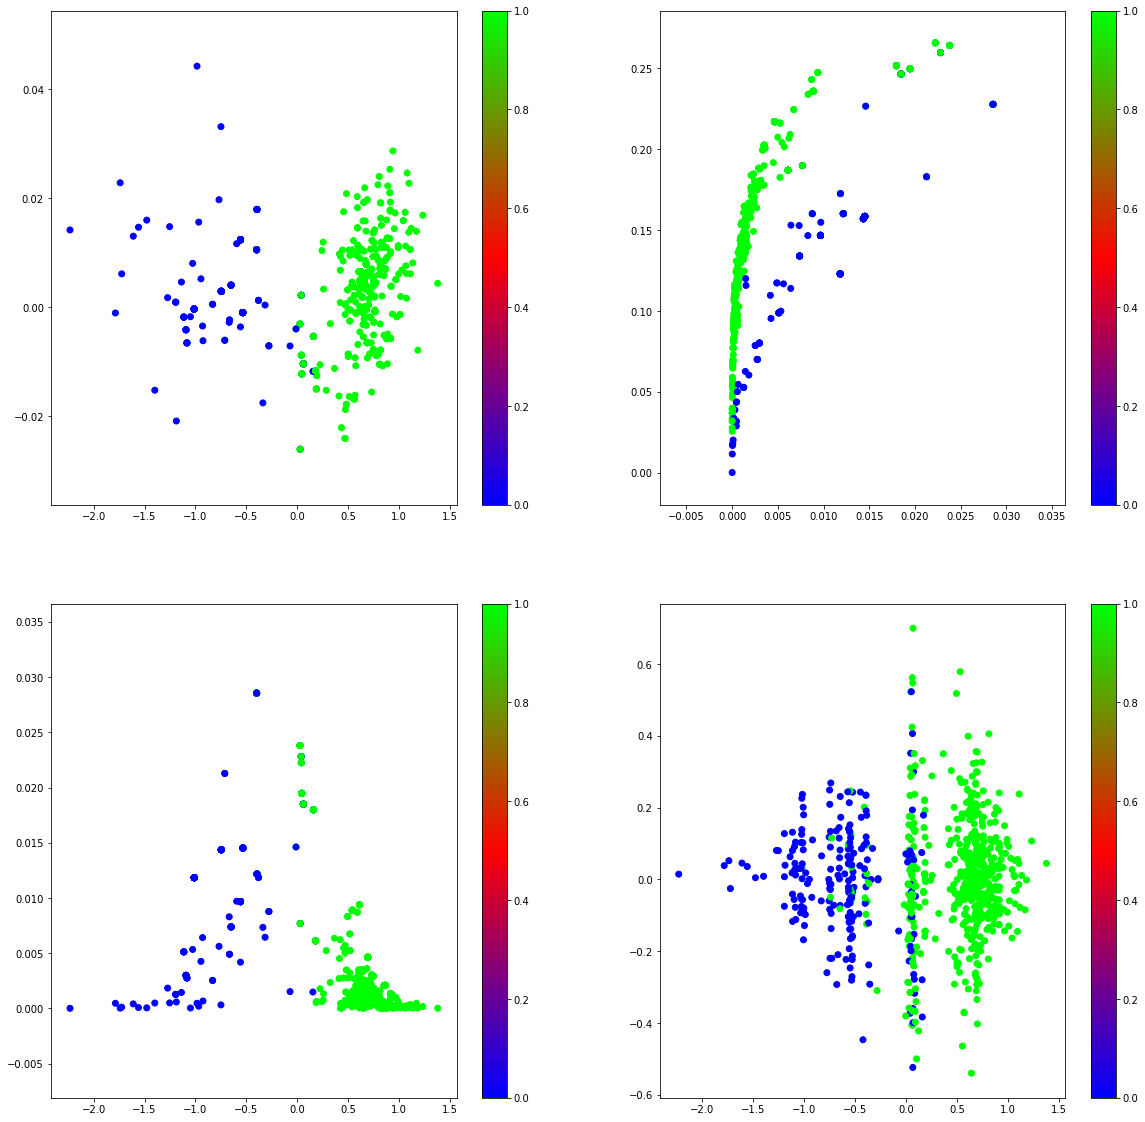

In [42]:
plot_2d_latent_space(model_supervised, onehot_encoder, smsSpam_data_train, smsSpam_labels_train_one_hot)

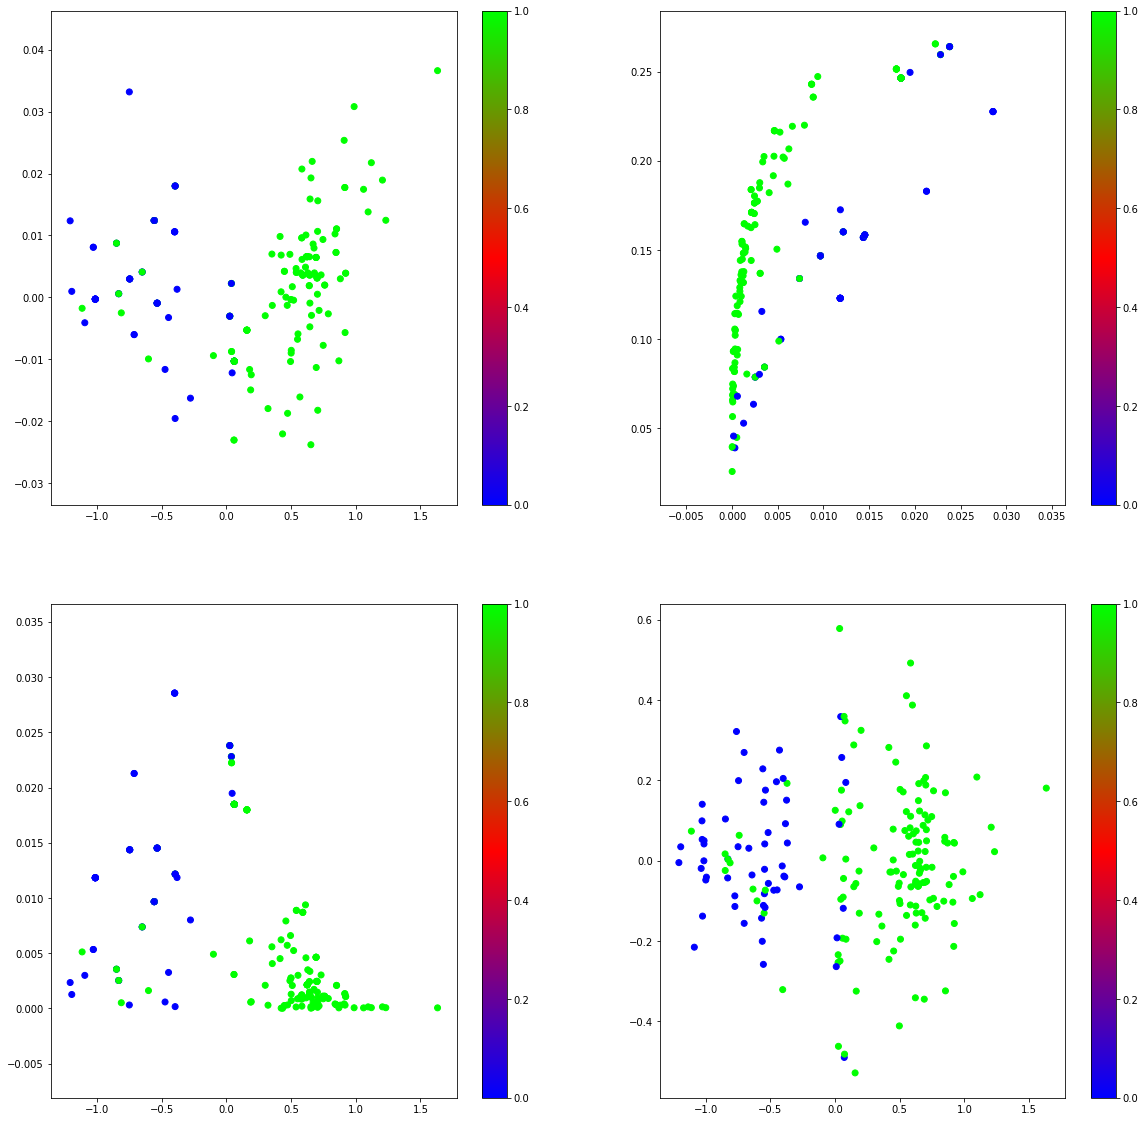

In [43]:
plot_2d_latent_space(model_supervised, onehot_encoder, smsSpam_data_test, smsSpam_labels_test_one_hot)

In [31]:
model_supervised.get_cum_thetas()

[[0.0, 3.1415927],
 [0.0, 3.1415927],
 [0.0, 3.1415927],
 [0.0, 3.1415927],
 [0.0, 3.1415927],
 [0.0, 3.1415927],
 [0.0, 3.1415927],
 [0.0, 3.1415927],
 [0.0, 3.1415927],
 [0.0, 3.1415927],
 [0.0, 3.1415927],
 [0.0, 3.1415927],
 [0.0, 3.1415927],
 [0.0, 3.1415927],
 [0.0, 3.1415927],
 [0.0, 3.1415927],
 [0.0, 3.1415927],
 [0.0, 3.1415927],
 [0.0, 3.1415927],
 [0.0, 3.1415927],
 [0.0, 3.1415927],
 [0.0, 3.1415927],
 [0.0, 3.1415927],
 [0.0, 3.1415927]]